In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from utils import *

### Fetch evaluation statistics

In [2]:
data = pd.read_csv(PATH / 'statistics.csv', names=['run', 'lap', 'seed', 'fid', 'isc'])
data = data[
    (data.run == 'easy-deluge-92_wubsk6w2')           # Tweedie
    | (data.run == 'carbonite-jawa-89_spp46l9r')      # Σ_t
    | (data.run == 'feasible-waterfall-85_50itfwu7')  # (I + Σ_t^{-1})^{-1}
]

In [3]:
data[data.lap == 31]

,run,lap,seed,fid,isc
124,carbonite-jawa-89_spp46l9r,31,0,125.585043,3.981800
125,easy-deluge-92_wubsk6w2,31,0,19.564951,7.606112
126,feasible-waterfall-85_50itfwu7,31,0,49.452122,6.990243


### Plots

In [4]:
rc = {
    'axes.axisbelow': True,
    'axes.linewidth': 1.0,
    'figure.dpi': 150,
    'figure.figsize': (3.2, 2.4),
    'font.size': 12.0,
    'legend.fontsize': 'xx-small',
    'lines.linewidth': 1.0,
    'savefig.transparent': True,
    'xtick.labelsize': 'x-small',
    'xtick.major.width': 1.0,
    'ytick.labelsize': 'x-small',
    'ytick.major.width': 1.0,
    'font.family': ['serif'],
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
}

plt.rcParams.update(rc)
sb.set_palette(sb.color_palette('deep'))

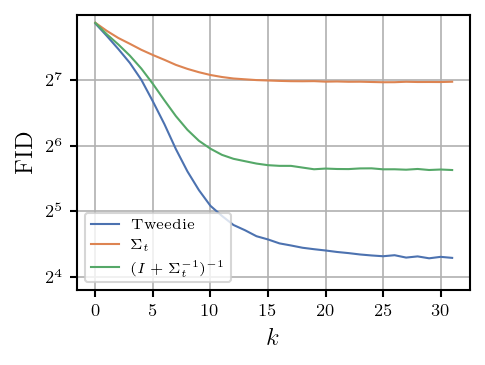

In [5]:
ax = sb.lineplot(data, x='lap', y='fid', hue='run')

ax.grid()
ax.set_ylim(14, 254)
ax.set_yscale('log', base=2)
ax.set_xlabel('$k$')
ax.set_ylabel('FID')

handles, _ = ax.get_legend_handles_labels()
labels = ['Tweedie', '$\Sigma_t$', '$(I + \Sigma_t^{-1})^{-1}$']

ax.legend(handles, labels)

fig = plt.gcf()
fig.tight_layout(pad=0.5)
fig.savefig('cifar_fid.pdf', dpi=300)

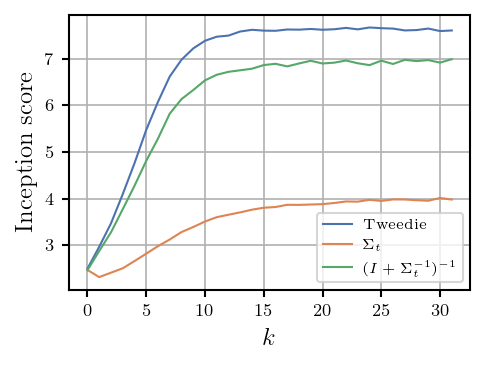

In [6]:
ax = sb.lineplot(data, x='lap', y='isc', hue='run')

ax.grid()
ax.set_xlabel('$k$')
ax.set_ylabel('Inception score')

handles, _ = ax.get_legend_handles_labels()
labels = ['Tweedie', '$\Sigma_t$', '$(I + \Sigma_t^{-1})^{-1}$']

ax.legend(handles, labels)

fig = plt.gcf()
fig.tight_layout(pad=0.5)
fig.savefig('cifar_isc.pdf', dpi=300)